In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
plt.style.use("ggplot")

## Prescription tokens

In [ ]:
pres_dist = pd.read_csv('/content/pres_token_dist_df.csv')

In [ ]:
pres_dist.head()

,index,token_count
0,0,33
1,1,22
2,2,37
3,3,64
4,4,33


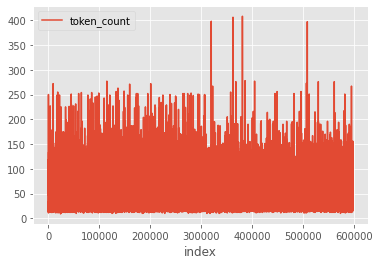

In [ ]:
pres_dist.plot(x='index', y='token_count')

In [ ]:
pres_dist['token_count'].describe()

count    596719.000000
mean         36.607727
std          15.116013
min           9.000000
25%          27.000000
50%          33.000000
75%          42.000000
max         408.000000
Name: token_count, dtype: float64

In [ ]:
pres_dist.min()['token_count']

9

In [ ]:
pres_dist.max()['token_count']

408

In [ ]:
count_level_dist = {
    'num_tokens': [],
    'percentage of data': [] 
}
for token_count in range(pres_dist.min()['token_count'], (pres_dist.max()['token_count'])+1):
  count_level_dist['num_tokens'].append(token_count)
  count_level_dist['percentage of data'].append(pres_dist[pres_dist['token_count'] == token_count].shape[0] / pres_dist.shape[0])

In [ ]:
token_count_data_percentange_df = pd.DataFrame(count_level_dist)

In [ ]:
token_count_data_percentange_df.head(4)

,num_tokens,percentage of data
0,9,0.000002
1,10,0.000013
2,11,0.000054
3,12,0.000144


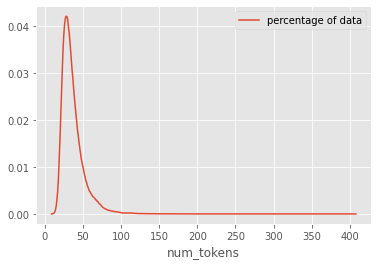

In [ ]:
token_count_data_percentange_df.plot(x='num_tokens', y='percentage of data')

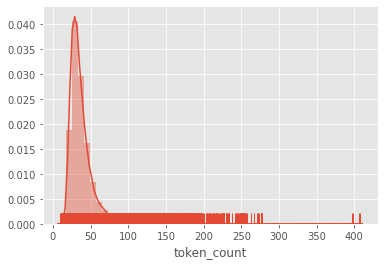

In [ ]:
ax = sns.distplot(pres_dist['token_count'], rug=True)

In [ ]:
# Mode
stats.mode(pres_dist['token_count'].values)

ModeResult(mode=array([28]), count=array([25111]))

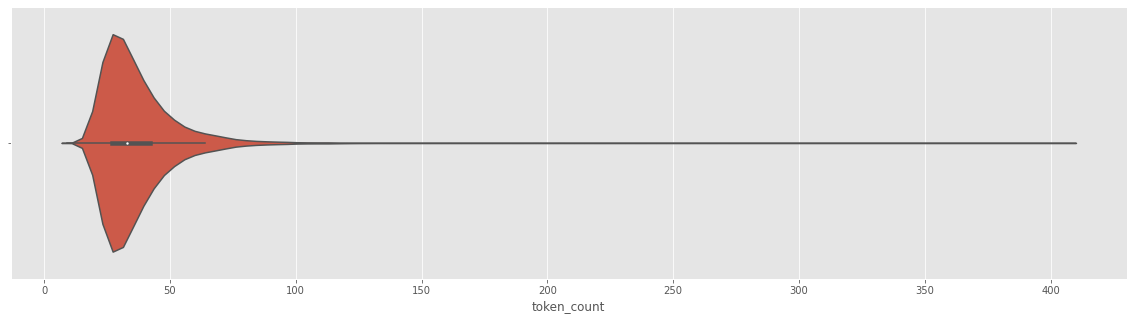

In [ ]:
plt.figure(figsize=(20, 5))
ax = sns.violinplot(x=pres_dist['token_count'])

In [ ]:
high_prob_threshold = 75

In [ ]:
pres_dist[pres_dist['token_count'] < 75].shape[0] / pres_dist.shape[0]

0.9750636396695932

### 97.5% of prescription data contains less than 75 tokens

## Condition Tokens

In [ ]:
cond_dist = pd.read_csv('/content/cond_token_dist_df.csv')

In [ ]:
cond_dist.head()

,index,token_count
0,0,21
1,1,10
2,2,28
3,3,54
4,4,25


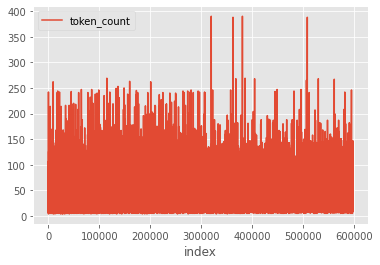

In [ ]:
cond_dist.plot(x='index', y='token_count')

In [ ]:
cond_dist['token_count'].describe()

count    596719.000000
mean         27.862801
std          14.963605
min           4.000000
25%          18.000000
50%          24.000000
75%          33.000000
max         390.000000
Name: token_count, dtype: float64

In [ ]:
cond_dist.min()['token_count']

4

In [ ]:
cond_dist.max()['token_count']

390

In [ ]:
cond_count_level_dist = {
    'num_tokens': [],
    'percentage of data': [] 
}
for token_count in range(cond_dist.min()['token_count'], (cond_dist.max()['token_count'])+1):
  cond_count_level_dist['num_tokens'].append(token_count)
  cond_count_level_dist['percentage of data'].append(cond_dist[cond_dist['token_count'] == token_count].shape[0] / cond_dist.shape[0])

In [ ]:
cond_token_count_data_percentange_df = pd.DataFrame(cond_count_level_dist)

In [ ]:
cond_token_count_data_percentange_df.head(4)

,num_tokens,percentage of data
0,4,0.000037
1,5,0.000248
2,6,0.000613
3,7,0.001083


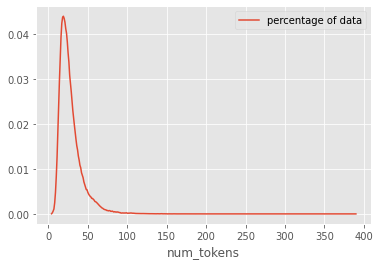

In [ ]:
cond_token_count_data_percentange_df.plot(x='num_tokens', y='percentage of data')

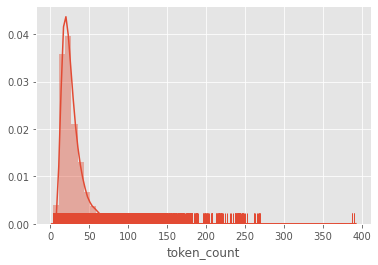

In [ ]:
ax = sns.distplot(cond_dist['token_count'], rug=True)

In [ ]:
# Mode
stats.mode(cond_dist['token_count'].values)

ModeResult(mode=array([19]), count=array([26246]))

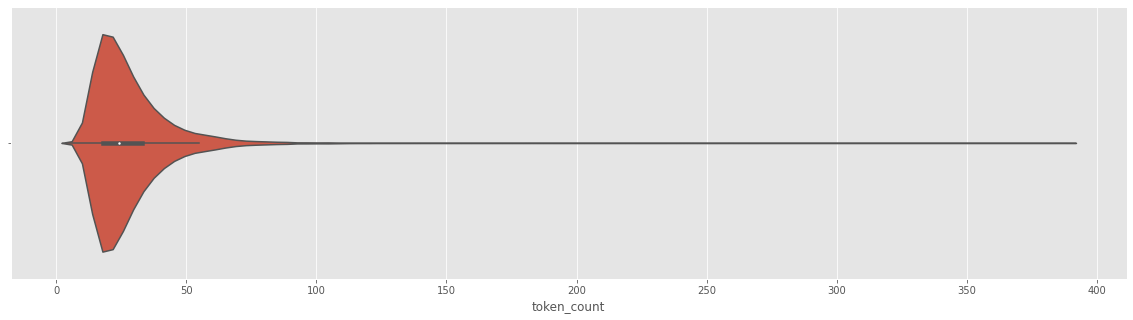

In [ ]:
plt.figure(figsize=(20, 5))
ax = sns.violinplot(x=cond_dist['token_count'])

In [ ]:
high_prob_threshold = 50

In [ ]:
cond_dist[cond_dist['token_count'] < 75].shape[0] / cond_dist.shape[0]

0.9852694484338524

### 98.5% of data contains less than 50 tokens

In [ ]:
# finetuning_arguments = {
# 	'--output_dir': f'./{model_base_directory}/task_name',
# 	'--overwrite_output_dir': True,
# 	'--save_steps': 0,
# 	'--seed': seed_value,
# 	'--num_train_epochs': 1,
# 	'--learning_rate': 5e-5,
# 	'--per_gpu_train_batch_size': 64,
# 	'--gradient_accumulation_steps': 1,
# 	'--per_gpu_eval_batch_size': 64,
#   '--evaluate_during_training': True,
#   '--max_seq_len': 128,
# 	'--dynamic_padding': True,
# 	'--smart_batching': True,
# 	'--fp16': True
# }

In [ ]:
from transformers import AutoTokenizer,

In [ ]:
tokenizer2 = AutoTokenizer.from_pretrained(pretrained_model_name_or_path ='bert-base-uncased')